## Machine Learning Foundations
# Supervised Machine Learning - Classification
Sumudu Tennakoon, PhD

<hr>

To learn more about Python, refeer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Iris Dataset (Multi-class Classification)
* Dataset Reference: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 
* Link to teh repository: https://archive.ics.uci.edu/ml/datasets/Iris

## Load Data

In [2]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Load CSV File
data = pd.read_csv(file_name, header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Assign Column names 
* Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

In [3]:
data.columns = ['sepal length', 
                'sepal width',
                'petal length',
                'petal width',
                'class' ]

data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Pre-processing Data

### Treat Duplicates Records

In [6]:
# identify duplicates
duplicates = data.loc[data.duplicated()]
duplicates

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [7]:
# Remove duplicates
data.drop_duplicates(keep='first', inplace=True)
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,147.0,NaN,NaN,NaN,5.856463,0.8291,4.3,5.1,5.8,6.4,7.9
sepal width,147.0,NaN,NaN,NaN,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal length,147.0,NaN,NaN,NaN,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal width,147.0,NaN,NaN,NaN,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5
class,147,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Encoding (Category to Number)

In [8]:
class_names = data['class'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
# Assign numbers to class labels (label number by count)
data['y_act'] = data['class']
data['y_act'].replace('Iris-setosa', 0, inplace=True)
data['y_act'].replace('Iris-virginica', 1, inplace=True)
data['y_act'].replace('Iris-versicolor', 2, inplace=True)

data.sample(5)

,sepal length,sepal width,petal length,petal width,class,y_act
10,5.4,3.7,1.5,0.2,Iris-setosa,0
65,6.7,3.1,4.4,1.4,Iris-versicolor,2
2,4.7,3.2,1.3,0.2,Iris-setosa,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,2
1,4.9,3.0,1.4,0.2,Iris-setosa,0


In [10]:
# Provide replacement dictionary object to do the same above

data['y_act'] = data['class']

replacements_dict = {'Iris-setosa':0,
                     'Iris-virginica':1,
                     'Iris-versicolor':2}

data['y_act'].replace(replacements_dict, inplace=True)

data.sample(5)

,sepal length,sepal width,petal length,petal width,class,y_act
68,6.2,2.2,4.5,1.5,Iris-versicolor,2
136,6.3,3.4,5.6,2.4,Iris-virginica,1
91,6.1,3.0,4.6,1.4,Iris-versicolor,2
80,5.5,2.4,3.8,1.1,Iris-versicolor,2
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [11]:
# What other pre-processing you can apply here?

# Exploring Data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  147 non-null    float64
 1   sepal width   147 non-null    float64
 2   petal length  147 non-null    float64
 3   petal width   147 non-null    float64
 4   class         147 non-null    object 
 5   y_act         147 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


### Univariate Analysis

In [13]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,147.0,NaN,NaN,NaN,5.856463,0.8291,4.3,5.1,5.8,6.4,7.9
sepal width,147.0,NaN,NaN,NaN,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal length,147.0,NaN,NaN,NaN,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal width,147.0,NaN,NaN,NaN,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5
class,147,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y_act,147.0,NaN,NaN,NaN,1.013605,0.819174,0.0,0.0,1.0,2.0,2.0


In [14]:
data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: class, dtype: int64

In [15]:
data['sepal length'].value_counts(bins=5)

(5.02, 5.74]     41
(5.74, 6.46]     41
(4.295, 5.02]    30
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: sepal length, dtype: int64

<AxesSubplot:ylabel='class'>

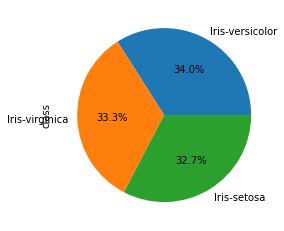

In [16]:
data['class'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:>

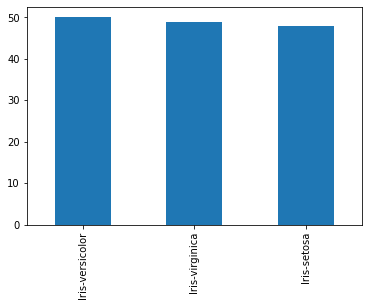

In [17]:
data['class'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

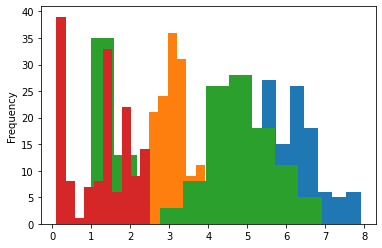

In [18]:
# Histograms
data['sepal length'].plot(kind='hist')
data['sepal width'].plot(kind='hist')
data['petal length'].plot(kind='hist')
data['petal width'].plot(kind='hist')


<AxesSubplot:ylabel='Density'>

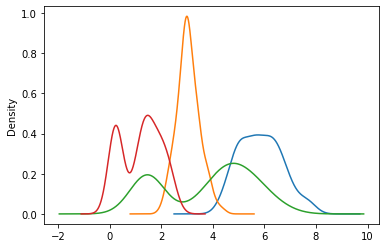

In [19]:
# Kernel Density Estimation
data['sepal length'].plot(kind='kde')
data['sepal width'].plot(kind='kde')
data['petal length'].plot(kind='kde')
data['petal width'].plot(kind='kde')

## Bivariate Analysis

### Analysing Variable Distributions by Class

<AxesSubplot:ylabel='Density'>

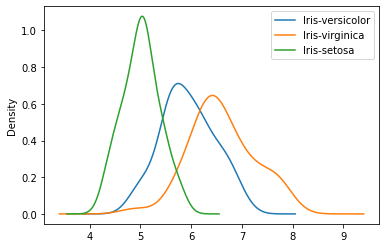

In [20]:
# class is a python keyword -> use `` to escape
data.query("`class`=='Iris-versicolor'")['sepal length'].plot(kind='kde', label='Iris-versicolor', legend=True)
data.query("`class`=='Iris-virginica'")['sepal length'].plot(kind='kde', label='Iris-virginica', legend=True)
data.query("`class`=='Iris-setosa'")['sepal length'].plot(kind='kde', label='Iris-setosa', legend=True)

<AxesSubplot:ylabel='Density'>

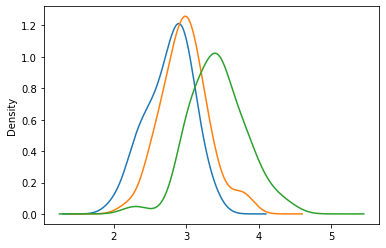

In [21]:
data.query("`class`=='Iris-versicolor'")['sepal width'].plot(kind='kde')
data.query("`class`=='Iris-virginica'")['sepal width'].plot(kind='kde')
data.query("`class`=='Iris-setosa'")['sepal width'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

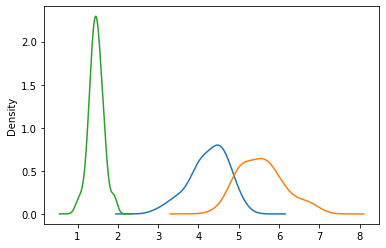

In [22]:
# class is a python keyword -> use `` to escape
data.query("`class`=='Iris-versicolor'")['petal length'].plot(kind='kde')
data.query("`class`=='Iris-virginica'")['petal length'].plot(kind='kde')
data.query("`class`=='Iris-setosa'")['petal length'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

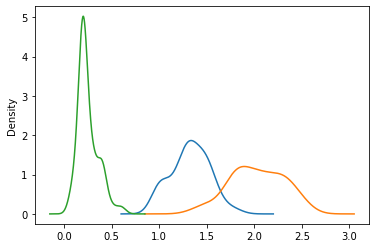

In [23]:
data.query("`class`=='Iris-versicolor'")['petal width'].plot(kind='kde')
data.query("`class`=='Iris-virginica'")['petal width'].plot(kind='kde')
data.query("`class`=='Iris-setosa'")['petal width'].plot(kind='kde')


### Finding Corelations

In [24]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'y_act'],
      dtype='object')

,sepal length,sepal width,petal length,petal width,y_act
sepal length,1.000000,-0.109321,0.871305,0.817058,0.449648
sepal width,-0.109321,1.000000,-0.421057,-0.356376,-0.618214
petal length,0.871305,-0.421057,1.000000,0.961883,0.642808
petal width,0.817058,-0.356376,0.961883,1.000000,0.572391
y_act,0.449648,-0.618214,0.642808,0.572391,1.000000


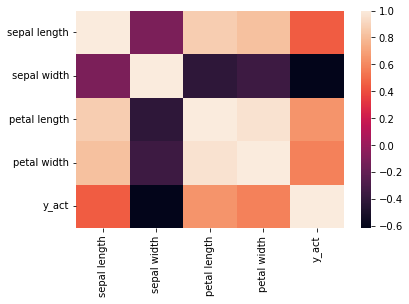

In [25]:
correlation_matrix = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'y_act']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

In [26]:
# Identify hightly corelated ferture pairs ?


### Pair Plot

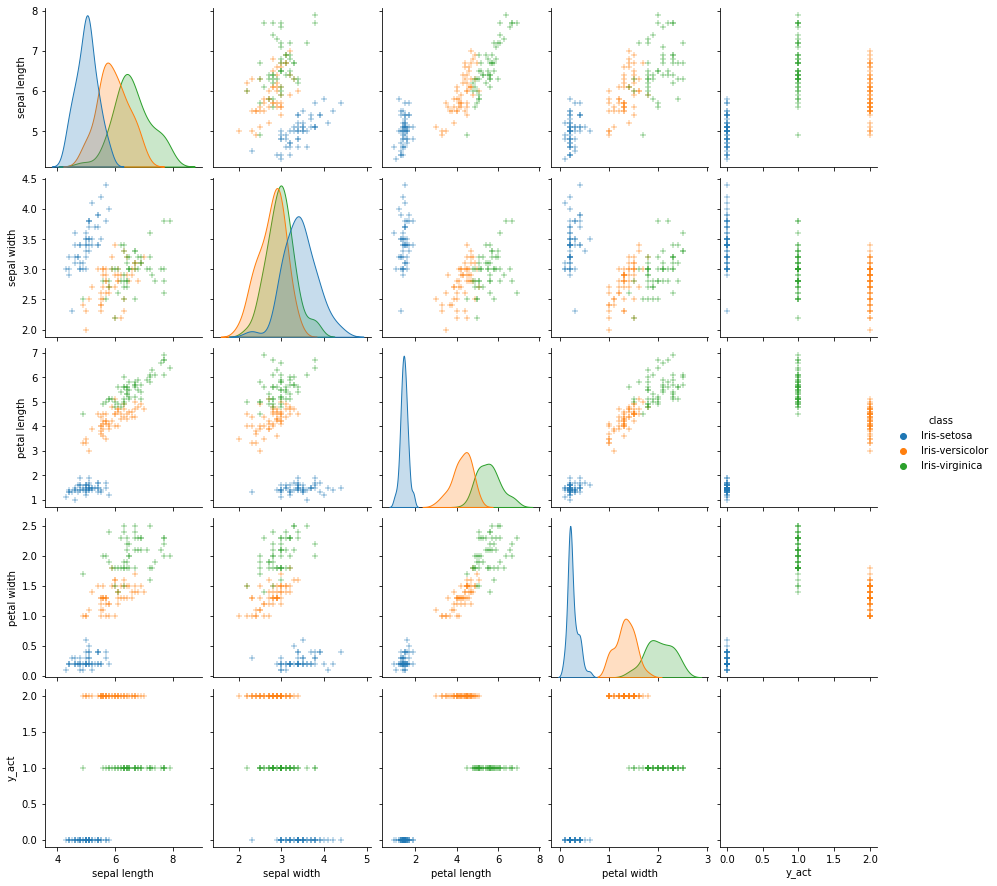

In [27]:
g = sns.pairplot(data, hue='class', markers='+')
plt.show()

## Preparing for Machine Learning Model training

### Identify features (`X`) and target variable (`y`)

In [28]:
X_variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
data[X_variables].head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [30]:
# Three classes (y variable)
data[y_varibale].unique()

array([0, 2, 1], dtype=int64)

In [31]:
#class_names to number map from the `replacements_dict` created above
replacements_dict

{'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2}

In [32]:
# Convert Features Data Frame to 2D Numpy array (optional)
X = data[X_variables].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [33]:
# Convert Target Column (Series) to  to 1D Numpy array (optional)
y = data[y_varibale].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [34]:
#Direcly use Features ad DataFrame and Target Column as a Series in Model Trainig
X = data[X_variables]
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
y = data[y_varibale]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

## Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 117
Test sample size  = 30


<hr>

## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [37]:
model = LogisticRegression()

## Train Model (use Training dataset)

In [38]:
model.fit(X_train, y_train)

LogisticRegression()

## Accesing Model Attributes

In [39]:
# Get class lables order used by the model to understand the outputs
model.classes_

array([0, 1, 2], dtype=int64)

In [40]:
# Variable coefficenits of one vs. all models for each class (3 models here)
model.coef_

array([[-0.50037933,  0.83427628, -2.3927737 , -0.94779893],
       [-0.02369701, -0.56000346,  2.67631173,  1.74412874],
       [ 0.52407634, -0.27427282, -0.28353803, -0.79632981]])

In [41]:
# Intercepts of one vs. all models for each class (3 models here)
model.intercept_

array([ 10.23024515, -12.37916411,   2.14891896])

In [42]:
# Get feeture names (column names if you provide Data Frame)
model.feature_names_in_

array(['sepal length', 'sepal width', 'petal length', 'petal width'],
      dtype=object)

## Predict (use Testing dataset)

In [43]:
# Probability -> Return 2D Numpy array (Columns are probality for each class, Rows are the records)
model.predict_proba(X_test)[:5]

array([[1.77330810e-03, 5.85431298e-01, 4.12795394e-01],
       [2.45216934e-02, 4.38557541e-02, 9.31622553e-01],
       [1.45650798e-05, 9.73085018e-01, 2.69004170e-02],
       [9.79362515e-01, 3.79787356e-08, 2.06374470e-02],
       [1.12563590e-02, 4.23574499e-01, 5.65169142e-01]])

In [44]:
# Predicted Class
model.predict(X_test)[:5]

array([1, 2, 1, 0, 2], dtype=int64)

## Creating Results DataFrame

### Get Predicted Probabilities of all three classes

In [45]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# class 0 probability
y_pred_prob_0

array([1.77330810e-03, 2.45216934e-02, 1.45650798e-05, 9.79362515e-01,
       1.12563590e-02, 9.71293587e-01, 8.42263444e-03, 9.56639972e-01,
       8.30700643e-04, 9.65074690e-01, 9.64179126e-01, 2.95655549e-01,
       4.52676437e-04, 3.57242334e-02, 2.68680097e-05, 3.12189257e-03,
       9.43920504e-01, 2.35057919e-02, 1.86102808e-03, 9.60659577e-01,
       9.67974334e-01, 1.20572742e-06, 9.84125930e-01, 1.19686747e-05,
       1.98823501e-01, 9.94622164e-01, 1.35876559e-02, 8.27708124e-07,
       1.62371228e-02, 9.71472169e-01])

In [46]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 0], dtype=int64)

### Create Results Data Frame for Test Sample

In [47]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2
57,2,2,0.198824,2.981390e-03,0.798195
120,1,1,0.000012,9.704517e-01,0.029536
9,0,0,0.965075,5.269939e-08,0.034925
66,2,2,0.013588,2.074956e-01,0.778917
140,1,1,0.000015,9.730850e-01,0.026900
146,1,1,0.000453,7.173056e-01,0.282242
19,0,0,0.979363,3.797874e-08,0.020637
30,0,0,0.960660,1.086848e-07,0.039340
107,1,1,0.000001,9.794549e-01,0.020544
83,2,1,0.000831,6.391016e-01,0.360068


In [48]:
#one-hot encode prediction column
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.001773,5.854313e-01,0.412795,0,1,0
53,2,2,0.024522,4.385575e-02,0.931623,0,0,1
140,1,1,0.000015,9.730850e-01,0.026900,0,1,0
19,0,0,0.979363,3.797874e-08,0.020637,1,0,0
106,1,2,0.011256,4.235745e-01,0.565169,0,0,1


## Evaluating Model

### Confusion Matrix

In [49]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,8,1,9
2,0,1,9,10
All,11,9,10,30


### Accuracy

In [50]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] + cfm.loc[2,2]) / cfm.loc['All','All'] 
acuracy

0.9333333333333333

In [51]:
# Use Scikit-Learn function (lgr = Logistic Regression)
acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_lgr

0.9333333333333333

### F1 Score

In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.9333333333333333

<hr>

# Decision Tree Classifier
* Use same training and testing datasets

In [53]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

## Visualize Decision Tree

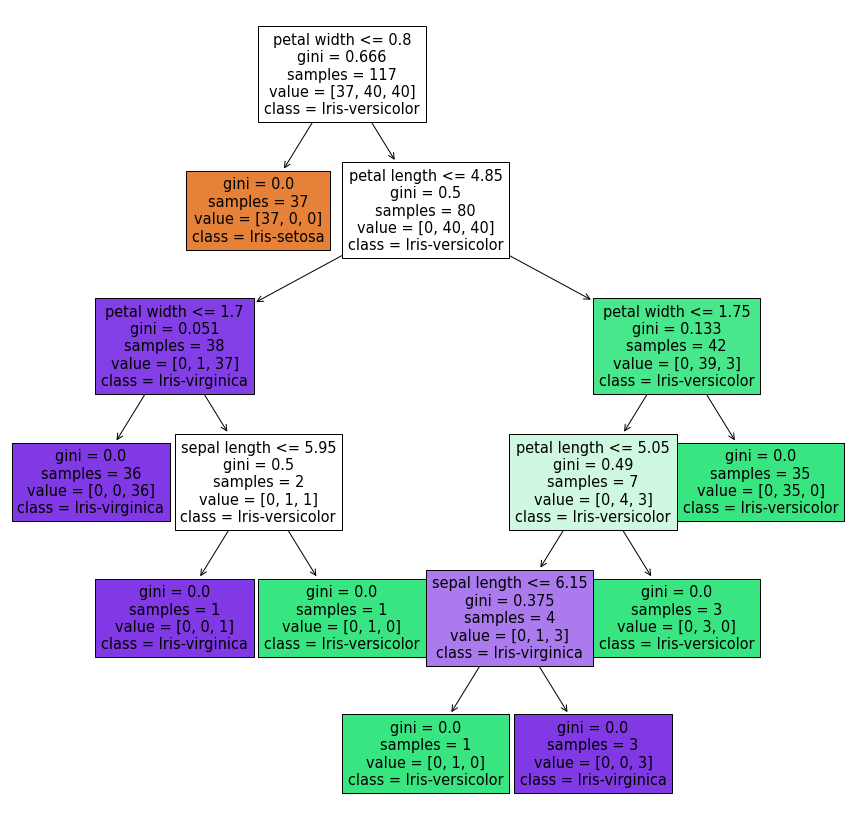

In [54]:
pfig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

In [55]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.0,1.0,0.0,0,1,0
53,2,2,0.0,0.0,1.0,0,0,1
140,1,1,0.0,1.0,0.0,0,1,0
19,0,0,1.0,0.0,0.0,1,0,0
106,1,2,0.0,0.0,1.0,0,0,1


In [56]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,8,1,9
2,0,1,9,10
All,11,9,10,30


In [57]:
# tc = Tree classifer
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_tc

0.9333333333333333

In [58]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted') 
f1_score_tc

0.9333333333333333

# Random Forest Classifier

In [59]:
# Create model object
model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [60]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.0,0.86,0.14,0,1,0
53,2,2,0.0,0.01,0.99,0,0,1
140,1,1,0.0,0.99,0.01,0,1,0
19,0,0,1.0,0.00,0.00,1,0,0
106,1,2,0.0,0.19,0.81,0,0,1


In [61]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,8,1,9
2,0,1,9,10
All,11,9,10,30


In [62]:
# rf = Random Forest classifer
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_rf

0.9333333333333333

In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.9333333333333333

# Support Vector Machines
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html

In [64]:
# Create model object
model = svm.SVC(kernel='linear', C=1.0, probability=True)

# Train Model
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [65]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.021859,0.678361,0.299780,0,1,0
53,2,2,0.013628,0.026722,0.959651,0,0,1
140,1,1,0.006817,0.989836,0.003347,0,1,0
19,0,0,0.967490,0.013055,0.019455,1,0,0
106,1,1,0.056113,0.725866,0.218021,0,1,0


In [66]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,9,0,9
2,0,1,9,10
All,11,10,9,30


In [67]:
acuracy_svm = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_svm

0.9666666666666667

In [68]:
f1_score_svm = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_svm

0.9666666666666667

# K-Neighbors Classifier
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [69]:
# Create model object
model = KNeighborsClassifier(n_neighbors=5)

# Train Model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.0,0.8,0.2,0,1,0
53,2,2,0.0,0.0,1.0,0,0,1
140,1,1,0.0,1.0,0.0,0,1,0
19,0,0,1.0,0.0,0.0,1,0,0
106,1,2,0.0,0.2,0.8,0,0,1


In [71]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,8,1,9
2,0,1,9,10
All,11,9,10,30


In [72]:
acuracy_knn = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_knn

0.9333333333333333

In [73]:
f1_score_knn = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_knn

0.9333333333333333

# Tabulating Model Perfomance

In [74]:
pd.DataFrame([{'model':'lgr', 'acuracy':acuracy_lgr, 'f1':f1_score_lgr},
              {'model':'tc', 'acuracy':acuracy_tc, 'f1':f1_score_tc},
              {'model':'rf', 'acuracy':acuracy_rf, 'f1':f1_score_rf},
              {'model':'svm', 'acuracy':acuracy_svm, 'f1':f1_score_svm},
              {'model':'knn', 'acuracy':acuracy_knn, 'f1':f1_score_knn}] 
             )
 

,model,acuracy,f1
0,lgr,0.933333,0.933333
1,tc,0.933333,0.933333
2,rf,0.933333,0.933333
3,svm,0.966667,0.966667
4,knn,0.933333,0.933333


<hr>
Last update 2022-04-09 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.